# Amazon Fine Food Reviews Analysis

In [1]:
# Information about dataset
# Reviews from Oct 1999 - Oct 2012
# 568,454 reviews
# 256,059 users
# 74,258 products
# 260 users with > 50 reviews

In [2]:
# Objective - Given a review, we have to determine the review is either positive (4 or 5) or 
    # Negative (1 or 2)
    
# Q: how to determine if a review is positive or negative ?

# Review 3 - nuetral and we have to ignore 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
import nltk
import string

In [3]:
# !pip install gensim

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [5]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [6]:
/*****word Tokenization and POS 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

In [7]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [8]:
import pickle

# Reading Data

In [9]:
con = sqlite3.connect('database.sqlite')
con

In [10]:
# Filtering only positive and negative review. i.e. not taking into consideration 
# those reviews with score = 50000

# SQL :
# SELECT * FROM REVIEWS WHERE SCORE !=3 LIMIT 500000 DATA POINT

filtered_data = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 
                                                LIMIT 5000""", con) 

def partition(x):
    if x <3:
        return 0
    return 1

# Changing reviews with score less than 3 to be negative and vice-versa

actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative
print("Number of data points in our data", filtered_data.shape)
filtered_data.head(10)

Number of data points in our data (5000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,1,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,1,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,1,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,1,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,1,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [11]:
import os
os.getcwd()

'C:\\Users\\ADMIN\\PythonClasses'

In [12]:
# os.chdir("path") - change your directory
# !unzip archive - unzip your archive dataset 

In [13]:
display = pd.read_sql_query("""
select userid,ProductId, ProfileName, Time, Score, Text, count(*) from reviews
group by UserId
Having count(*) > 1 """, con)

In [14]:
display.shape

(80668, 7)

In [15]:
display.tail(100)

,UserId,ProductId,ProfileName,Time,Score,Text,count(*)
80568,AZTA7TY9XF5MC,B001VIY7O0,"Lisa K. Neitzel ""music lover""",1310947200,5,I have a 3 yr old toy poodle that has never be...,2
80569,AZTBQJGZ08YAC,B0045Z6K50,Leora Rames,1262044800,5,I just recived the keurig for Christmas and al...,3
80570,AZTEQJCI6N5WL,B0027IQC5K,"Mari Hofman ""dog lover""",1296172800,5,I have three Newfoundlands so we go through a ...,5
80571,AZTG44D6K1FR5,B000A2BCJG,"Marc J. Blumencranz ""Hockey Fan""",1332288000,1,I ordered a box of power bar energy gels and t...,2
80572,AZTJLHRWZTBKN,B005P0NI4K,brich,1340841600,4,This Celtic Sea Salt is delicious! Recommende...,2
...,...,...,...,...,...,...,...
80663,AZZNK89PXD006,B001J3ZUQ6,Etude,1269648000,5,In this package you get three varieties of pop...,6
80664,AZZTH6DJ0KSIP,B00014IVPQ,Crystal Caccamo,1304208000,5,ive bought a few different kinds and i feel th...,3
80665,AZZU1VEO8KUXH,B003FDC2I2,"Mia P ""Mia P""",1317513600,5,I bought this for my 13 year old daughter who ...,3
80666,AZZU4D6TZ2L6J,B0029XITW2,"Sherry King ""llamasmama""",1247875200,5,My father thought this was the best cheese eve...,2


In [16]:
display[display['UserId']=='AZY10LLTJ71NX']

,UserId,ProductId,ProfileName,Time,Score,Text,count(*)
80638,AZY10LLTJ71NX,B001ATMQK2,"undertheshrine ""undertheshrine""",1296691200,5,I bought this 6 pack because for the price tha...,5


In [19]:
display['count(*)'].sum()

393063

# Exploratory Data Analysis

#### 1) Data Cleaning : Deduplication

In [17]:
# AZTEQJCI6N5WL
# AZZNK89PXD006
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [18]:
# sorting data in ascending order
sorted_data = filtered_data.sort_values('ProductId', axis=0,
                                        ascending = True,inplace = False, 
                                        kind = 'quicksort', na_position='last')


In [18]:
sorted_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,1,1282953600,thirty bucks?,Why is this $[...] when the same product is av...
2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,1,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...
1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,1,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...
1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,1,961718400,Great Product,This was a really good idea and the final prod...
2942,3204,B000084DVR,A1UGDJP1ZJWVPF,"T. Moore ""thoughtful reader""",1,1,1,1177977600,Good stuff!,I'm glad my 45lb cocker/standard poodle puppy ...
...,...,...,...,...,...,...,...,...,...,...
711,765,B009HINRX8,A1OEL4UZT3KKI4,"coffee drinker in PA ""coffee drinker in PA""",0,0,1,1344988800,great coffee - terrible price,"This is one of the best choices, in my opinion..."
710,764,B009HINRX8,ADDBLG0CFY9AI,S.A.D.,1,1,1,1326758400,Best of the Tassimo's,We've tried many Tassimo flavors. This is by ...
709,763,B009HINRX8,A3N9477PUE6WMR,patc477,4,4,1,1323302400,Good Tasting cup o' joe,This is a bold blend that has a great taste. T...
713,768,B009HINRX8,A2CAZG1CQ8BQI5,Patricia J. Nohalty,0,0,1,1337212800,Kona for Tassimo,Of all the coffee's available for Tassimo this...


In [19]:
# Deduplication of entries - drop
final = sorted_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},
                                    keep='first', inplace=False)

In [20]:
final.shape

(4986, 10)

In [21]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)

display.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [22]:
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]

In [23]:
final.shape

(4986, 10)

In [26]:
final['Score'].value_counts()

1    4178
0     808
Name: Score, dtype: int64

# Text Preprocessing 

In [24]:
# Printing some sample random reviews
sent_0 = final['Text'].values[0]
print(sent_0)
print("="*50)

sent_1000 = final['Text'].values[1000]
print(sent_1000)
print("="*50)

sent_1500 = final['Text'].values[1500]
print(sent_1500)
print("="*50)

sent_4900 = final['Text'].values[4900]
print(sent_4900)
print("="*50)

Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
I recently tried this flavor/brand and was surprised at how delicious these chips are.  The best thing was that there were a lot of "brown" chips in the bsg (my favorite), so I bought some more through amazon and shared with family and friends.  I am a little disappointed that there are not, so far, very many brown chips in these bags, but the flavor is still very good.  I like them better than the yogurt and green onion flavor because they do not seem to be as salty, and the onion flavor is better.  If you haven't eaten Kettle chips before, I recommend that you try a bag before buying bulk.  They are thicker and crunchier than Lays but just as fresh out of the bag.
Wow.  So far, two two-star reviews.  One obviously had no 

In [26]:
import re
sent_0 = re.sub(r"http\S+", "", sent_0)
sent_1000 = re.sub(r"http\S+", "", sent_1000)
sent_150 = re.sub(r"http\S+", "", sent_1500)
sent_4900 = re.sub(r"http\S+", "", sent_4900)

print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.

In [31]:
# webscrpping - BeautifulSoup
from bs4 import BeautifulSoup

soup = BeautifulSoup(sent_0, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1000, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_1500, 'lxml')
text = soup.get_text()
print(text)
print("="*50)

soup = BeautifulSoup(sent_4900, 'lxml')
text = soup.get_text()
print(text)

Why is this $[...] when the same product is available for $[...] here? />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.
I recently tried this flavor/brand and was surprised at how delicious these chips are.  The best thing was that there were a lot of "brown" chips in the bsg (my favorite), so I bought some more through amazon and shared with family and friends.  I am a little disappointed that there are not, so far, very many brown chips in these bags, but the flavor is still very good.  I like them better than the yogurt and green onion flavor because they do not seem to be as salty, and the onion flavor is better.  If you haven't eaten Kettle chips before, I recommend that you try a bag before buying bulk.  They are thicker and crunchier than Lays but just as fresh out of the bag.
Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I'm sorry; but these

In [27]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [31]:
sent_1500 = decontracted(sent_1500)
print(sent_1500)
print("="*50)

Wow.  So far, two two-star reviews.  One obviously had no idea what they were ordering; the other wants crispy cookies.  Hey, I am sorry; but these reviews do nobody any good beyond reminding us to look  before ordering.<br /><br />These are chocolate-oatmeal cookies.  If you do not like that combination, do not order this type of cookie.  I find the combo quite nice, really.  The oatmeal sort of "calms" the rich chocolate flavor and gives the cookie sort of a coconut-type consistency.  Now let is also remember that tastes differ; so, I have given my opinion.<br /><br />Then, these are soft, chewy cookies -- as advertised.  They are not "crispy" cookies, or the blurb would say "crispy," rather than "chewy."  I happen to like raw cookie dough; however, I do not see where these taste like raw cookie dough.  Both are soft, however, so is this the confusion?  And, yes, they stick together.  Soft cookies tend to do that.  They are not individually wrapped, which would add to the cost.  Oh y

In [28]:
sent_0 = re.sub("\S*\d\S*", "", sent_0).strip()
print(sent_0)

Why is this $[...] when the same product is available for $[...] here?<br /> /><br />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [33]:
# remove special charactor
sent_1500 = re.sub('[^A-Za-z0-9]+', ' ', sent_1500)
print(sent_1500)

Wow So far two two star reviews One obviously had no idea what they were ordering the other wants crispy cookies Hey I am sorry but these reviews do nobody any good beyond reminding us to look before ordering br br These are chocolate oatmeal cookies If you do not like that combination do not order this type of cookie I find the combo quite nice really The oatmeal sort of calms the rich chocolate flavor and gives the cookie sort of a coconut type consistency Now let is also remember that tastes differ so I have given my opinion br br Then these are soft chewy cookies as advertised They are not crispy cookies or the blurb would say crispy rather than chewy I happen to like raw cookie dough however I do not see where these taste like raw cookie dough Both are soft however so is this the confusion And yes they stick together Soft cookies tend to do that They are not individually wrapped which would add to the cost Oh yeah chocolate chip cookies tend to be somewhat sweet br br So if you wa

In [29]:
stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [36]:
stopwords 

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same

In [32]:
# combining all the text

from tqdm import tqdm

preprocessed_reviews = []

# tqdm is for printing the status bar
for sentance in tqdm(final['Text'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentance.strip())

100%|██████████| 4986/4986 [00:01<00:00, 2717.27it/s]


In [33]:
preprocessed_reviews[1500]

'wow far two two star reviews one obviously no idea ordering wants crispy cookies hey sorry reviews nobody good beyond reminding us look ordering chocolate oatmeal cookies not like combination not order type cookie find combo quite nice really oatmeal sort calms rich chocolate flavor gives cookie sort coconut type consistency let also remember tastes differ given opinion soft chewy cookies advertised not crispy cookies blurb would say crispy rather chewy happen like raw cookie dough however not see taste like raw cookie dough soft however confusion yes stick together soft cookies tend not individually wrapped would add cost oh yeah chocolate chip cookies tend somewhat sweet want something hard crisp suggest nabiso ginger snaps want cookie soft chewy tastes like combination chocolate oatmeal give try place second order'

In [40]:
# NLP algorithm
# BAG OF WORDS
# Uni-Grams/Bi-Grams/Tri-Grams/N-Grams 
# TF-IDF 
# Word2Vec 

In [41]:
# Machine Learning with NLP Project

# BAG OF WORDS

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() # in scikt-learn / sklearn
count_vect.fit(preprocessed_reviews)

print("some feature name", count_vect.get_feature_names()[:10])

print("="*50)


final_counts = count_vect.transform(preprocessed_reviews)

print("The type of count vectorizer", type(final_counts))

print("the shape of out text BOW Vectorizer", final_counts.get_shape())

print("the number of unique words", final_counts.get_shape()[1])

some feature name ['aa', 'aahhhs', 'aback', 'abandon', 'abates', 'abbott', 'abby', 'abdominal', 'abiding', 'ability']
The type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW Vectorizer (4986, 12997)
the number of unique words 12997


# Bi-Grams and n-Grams

In [35]:
# uni-grams, bi-grams, tri-grams, n-grams
# removing stop words like "not" should be avoided before building n-Grams

count_vect = CountVectorizer(ngram_range = (1,2), min_df=10, max_features=5000)
final_bigram = count_vect.fit_transform(preprocessed_reviews)

print("the type of count vectorizer", type(final_bigram))
print("the shape of out text Bigram Vectorizer", final_bigram.get_shape())

print("the number of unique words for bigram", final_bigram.get_shape()[1])


the type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text Bigram Vectorizer (4986, 3144)
the number of unique words for bigram 3144


# TF-IDF

In [39]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1, 2), min_df = 10)
tf_idf_vect.fit(preprocessed_reviews)
print("some feature name", tf_idf_vect.get_feature_names()[0:10])

print("="*50)

final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)

print("The type of count vectorizer", type(final_counts_tfidf))

print("the shape ", final_counts_tfidf.get_shape())

print("the number of unique words", final_counts_tfidf.get_shape()[1])

some feature name ['ability', 'able', 'able find', 'able get', 'absolute', 'absolutely', 'absolutely delicious', 'absolutely love', 'absolutely no', 'according']
The type of count vectorizer <class 'scipy.sparse.csr.csr_matrix'>
the shape  (4986, 3144)
the number of unique words 3144


# Word2Vec

In [37]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [38]:
# Using Google News Word2Vectors

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.




is_your_ram_gt_16g=False
want_to_use_google_w2v = False
want_to_train_w2v = True

if want_to_train_w2v:
    # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))
    
elif want_to_use_google_w2v and is_your_ram_gt_16g:
    if os.path.isfile('GoogleNews-vectors-negative300.bin'):
        w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
        print(w2v_model.wv.most_similar('great'))
        print(w2v_model.wv.most_similar('worst'))
    else:
        print("you don't have gogole's word2vec file, keep want_to_train_w2v = True, to train your own w2v ")

[('good', 0.9899541735649109), ('buds', 0.9876429438591003), ('alternative', 0.9876107573509216), ('flavorful', 0.9871039390563965), ('enjoy', 0.9869922399520874), ('tasty', 0.9868162274360657), ('describe', 0.9867599606513977), ('salty', 0.9867472648620605), ('crunchy', 0.9862780570983887), ('regular', 0.9862692356109619)]
[('varieties', 0.998788058757782), ('uses', 0.998586893081665), ('de', 0.9985355138778687), ('opinion', 0.9985284805297852), ('perhaps', 0.9984257817268372), ('cherry', 0.9984237551689148), ('peanuts', 0.9984067678451538), ('part', 0.9984049797058105), ('served', 0.9983886480331421), ('unlike', 0.9983707070350647)]


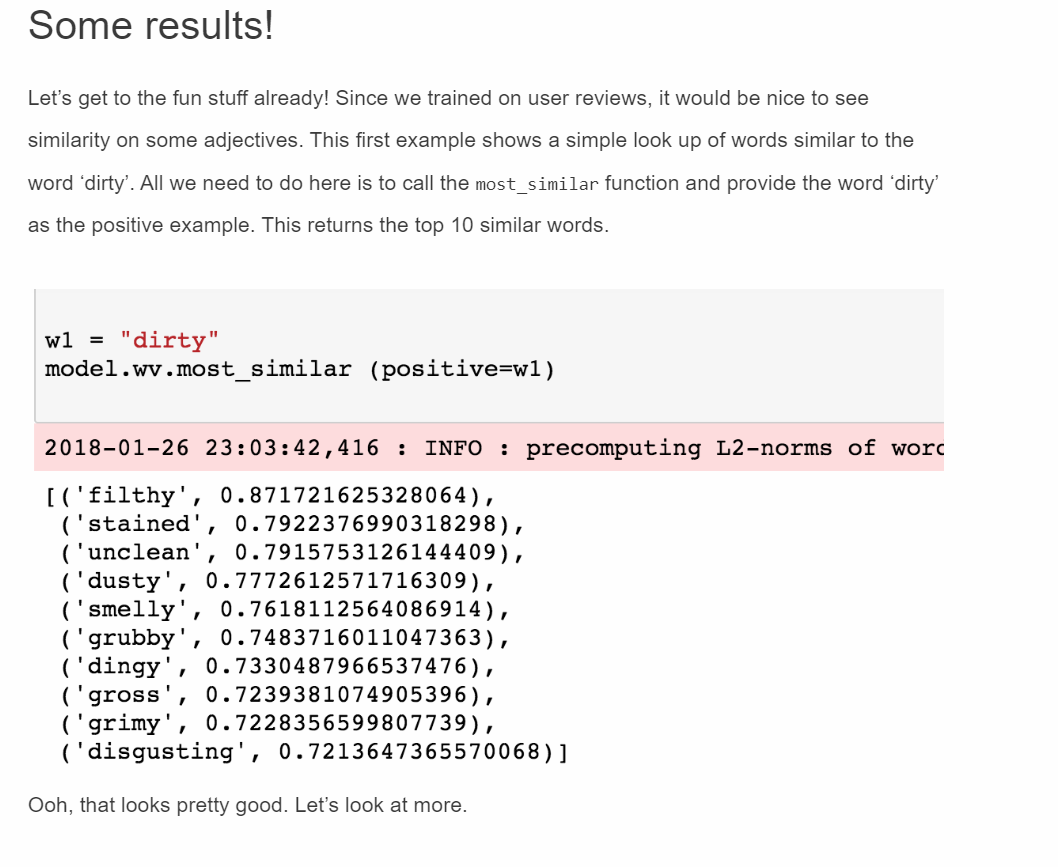